In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("employee_reviews.csv")
df.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [3]:
# Data cleaning and transformation
df = df.drop(['Unnamed: 0'], axis=1)
df = df.replace('none',0,regex=True)
df.drop(columns=['location', 'link', 'advice-to-mgmt','pros','cons','summary', 'helpful-count'], inplace=True)
df.rename(columns={'work-balance-stars':'work-balance', 'culture-values-stars':'culture-value', 
                   'carrer-opportunities-stars':'opportunities-stars', 
                   'senior-mangemnet-stars':'management-stars','comp-benefit-stars':'benefits-stars'}, inplace=True)
df['work-balance'] = pd.to_numeric(df['work-balance'])
df['culture-value'] = pd.to_numeric(df['culture-value'])
df['opportunities-stars'] = pd.to_numeric(df['opportunities-stars'])
df['benefits-stars'] = pd.to_numeric(df['benefits-stars'])
df['management-stars'] = pd.to_numeric(df['management-stars'])

df.head()


,company,dates,job-title,overall-ratings,work-balance,culture-value,opportunities-stars,benefits-stars,management-stars
0,google,"Dec 11, 2018",Current Employee - Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
1,google,"Jun 21, 2013",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0
2,google,"May 10, 2014",Current Employee - Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0
3,google,"Feb 8, 2015",Current Employee - Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0
4,google,"Jul 19, 2018",Former Employee - Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0


In [4]:
df.to_csv("reviews.csv",index=False)

In [5]:
df.describe()

,overall-ratings,work-balance,culture-value,opportunities-stars,benefits-stars,management-stars
count,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000
mean,3.826075,3.015593,3.025308,3.251522,3.524427,2.939981
std,1.154989,1.609086,1.907831,1.608777,1.561344,1.627537
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000
50%,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


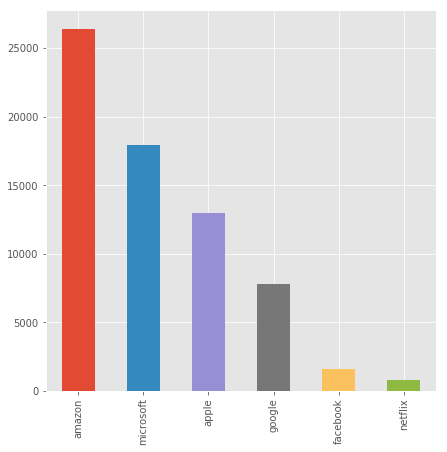

In [6]:
review_count = df['company'].value_counts()
plt.figure(figsize=(7,7))
review_count.plot(kind="bar")
plt.show()

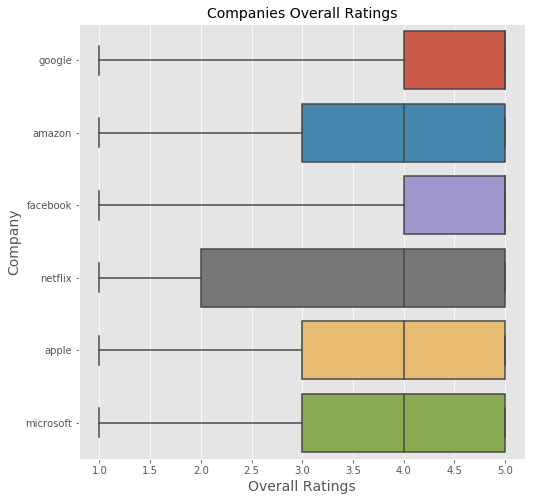

In [7]:
plt.figure(figsize=(8,8))
sns.boxplot(x="overall-ratings", y="company", data=df, whis="range")
plt.xlabel('Overall Ratings', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.title('Companies Overall Ratings', fontsize=14)
plt.show()

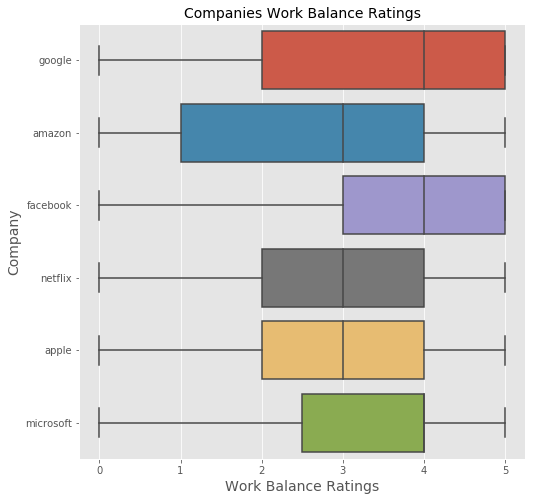

In [8]:
plt.figure(figsize=(8,8))
sns.boxplot(x="work-balance", y="company", data=df, whis="range")
plt.xlabel('Work Balance Ratings', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.title('Companies Work Balance Ratings', fontsize=14)
plt.show()

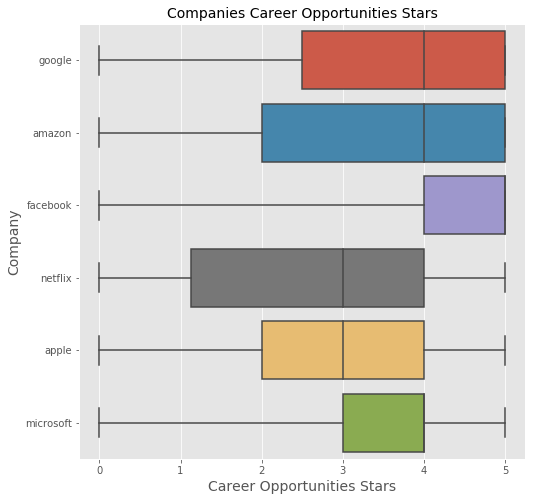

In [9]:
plt.figure(figsize=(8,8))
sns.boxplot(x="opportunities-stars", y="company", data=df, whis="range")
plt.xlabel('Career Opportunities Stars', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.title('Companies Career Opportunities Stars', fontsize=14)
plt.show()

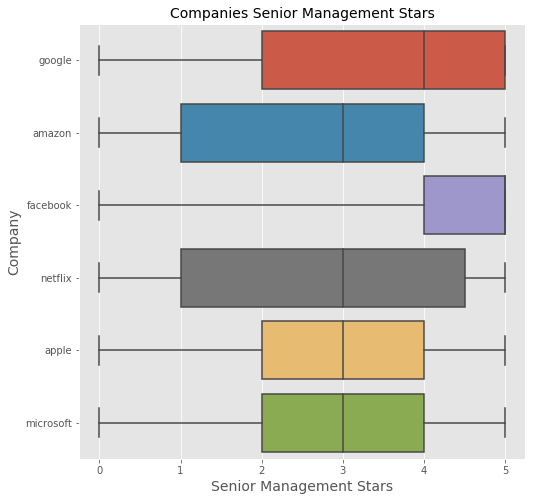

In [10]:
plt.figure(figsize=(8,8))
sns.boxplot(x="management-stars", y="company", data=df, whis="range")
plt.xlabel('Senior Management Stars', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.title('Companies Senior Management Stars', fontsize=14)
plt.show()

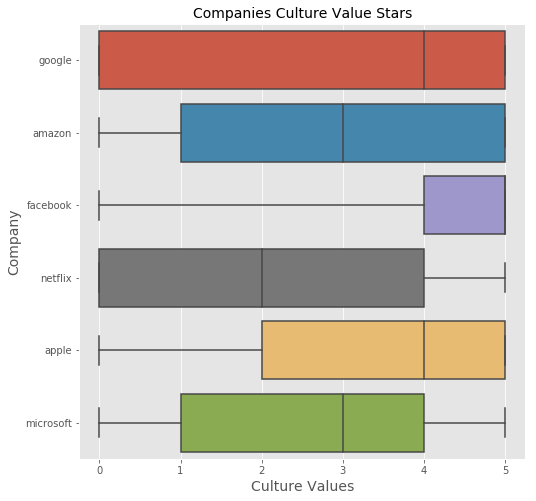

In [13]:
plt.figure(figsize=(8,8))
sns.boxplot(x="culture-value", y="company", data=df, whis="range")
plt.xlabel('Culture Values', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.title('Companies Culture Value Stars', fontsize=14)
plt.show()

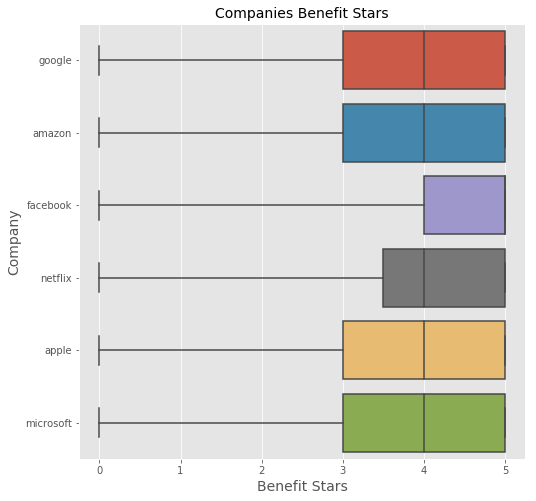

In [12]:
plt.figure(figsize=(8,8))
sns.boxplot(x="benefits-stars", y="company", data=df, whis="range")
plt.xlabel('Benefit Stars', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.title('Companies Benefit Stars', fontsize=14)
plt.show()